In [3]:
import numpy as np
from PIL import Image
from IPython.display import display

In [23]:
def sharpen(img, mask):
    m_size = len(mask)

    if m_size % 2 == 0:
        return

    half_mask_size = m_size // 2

    new_img = np.empty(img.shape, dtype=np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                res = 0;
                for x in range(-half_mask_size,half_mask_size+1):
                    if i + x < 0 or i + x >= img.shape[0]:
                        continue
                    for y in range(-half_mask_size,half_mask_size+1):
                        if j + y < 0 or j + y >= img.shape[1]:
                            continue
                        res += img[i + x][j + y][k] * mask[half_mask_size + x][half_mask_size + y]
                res = max(0, min(res, 255))
                new_img[i][j][k] = res

    return new_img

In [24]:
img = Image.open('Images/moon.jpg')
img_mat = np.array(img)

In [25]:
img_mat.shape

(330, 289, 3)

In [30]:
mask = [[0,1,0],[1,-4,1],[0,1,0]]

new_mat = sharpen(img_mat, mask)

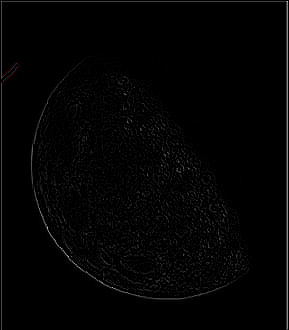

In [31]:
new_img = Image.fromarray(new_mat)
display(new_img)

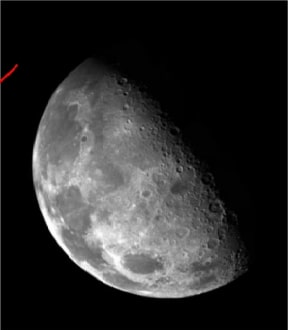

In [47]:
display(img)

In [49]:
from PIL import ImageFilter

In [52]:
sharpen_img = img.filter(ImageFilter.SHARPEN)

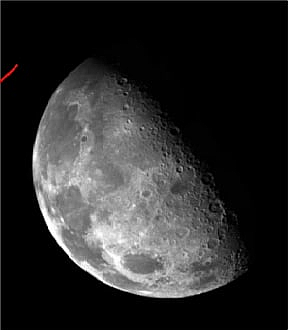

In [53]:
display(sharpen_img)

In [54]:
sharpen_img2 = sharpen_img.filter(ImageFilter.SHARPEN)

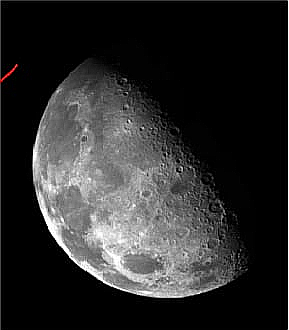

In [55]:
display(sharpen_img2)